# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_price_fetch = requests.get(btc_url)
btc_price_fetch

<Response [200]>

In [7]:
#Load BTC price data into python dictionary using json.loads
btc_price_data = json.loads(btc_price_fetch.content.decode('utf-8'))
btc_price_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19175187,
   'total_supply': 19175187,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 19405.98,
     'volume_24h': 18100046708,
     'market_cap': 372127020967,
     'percentage_change_1h': 0.310021480613954,
     'percentage_change_24h': -0.471411361778428,
     'percentage_change_7d': 1.78771040949033,
     'percent_change_1h': 0.310021480613954,
     'percent_change_24h': -0.471411361778428,
     'percent_change_7d': 1.78771040949033}},
   'last_updated': 1665407646}},
 'metadata': {'timestamp': 1665407646,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [8]:
btc_current_price = btc_price_data['data']['1']['quotes']['USD']['price']
btc_current_price

19405.98

In [9]:
# Fetch current ETH price
eth_price_fetch = requests.get(eth_url)
eth_price_fetch

<Response [200]>

In [10]:
#Load ETH price data into python dictionary using json.loads
eth_price_data = json.loads(eth_price_fetch.content.decode('utf-8'))
eth_price_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120892178,
   'total_supply': 120892178,
   'max_supply': 120892178,
   'quotes': {'USD': {'price': 1317.37,
     'volume_24h': 6059065903,
     'market_cap': 159277860620,
     'percentage_change_1h': 0.166100169311114,
     'percentage_change_24h': -0.656899456904088,
     'percentage_change_7d': 3.08861137408421,
     'percent_change_1h': 0.166100169311114,
     'percent_change_24h': -0.656899456904088,
     'percent_change_7d': 3.08861137408421}},
   'last_updated': 1665407652}},
 'metadata': {'timestamp': 1665407652,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [11]:
eth_current_price = eth_price_data['data']['1027']['quotes']['USD']['price']
eth_current_price

1317.37

In [12]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
my_btc_value, my_eth_value

(23287.176, 6982.060999999999)

In [13]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $23,287.18
The current value of your 5.3 ETH is $6,982.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [16]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST( alpaca_api_key,
                            alpaca_secret_key,
                            api_version = 'v2')

In [17]:
# Format current date as ISO format
current_date = pd.Timestamp('2022-10-07', tz = "America/New_York").isoformat()
current_date

'2022-10-07T00:00:00-04:00'

In [18]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [19]:
# Get current closing prices for SPY and AGG
df_stock_current = alpaca_api.get_bars(  tickers,
                                         timeframe,
                                         start = current_date,
                                         end = current_date).df
df_stock_current

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-07 04:00:00+00:00,95.81,96.0100,95.68,95.77,6149309,18717,95.836813,AGG
2022-10-07 04:00:00+00:00,369.06,373.2933,360.94,362.79,107239188,665841,365.065822,SPY


In [20]:
# Reorganize the DataFrame
# Separate ticker data
df_agg_current = df_stock_current[df_stock_current["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy_current = df_stock_current[df_stock_current["symbol"] == "SPY"].drop("symbol", axis = 1)

In [21]:
# Concatenate the ticker DataFrames
df_stock_current = pd.concat([df_agg_current, df_spy_current], axis = 1, keys=["AGG","SPY"])

In [22]:
# Preview DataFrame
df_stock_current

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-07 04:00:00+00:00  95.81  96.01  95.68  95.77  6149309       18717   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2022-10-07 04:00:00+00:00  95.836813  369.06  373.2933  360.94  362.79   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-07 04:00:00+00:00  107239188      665841  365.065822

In [23]:
# Pick AGG and SPY close prices
agg_close_price = df_stock_current["AGG"]["close"].iloc[0]
spy_close_price = df_stock_current["SPY"]["close"].iloc[0]

In [24]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.77
Current SPY closing price: $362.79


In [25]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

In [26]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG bonds is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $18,139.50
The current value of your 200 AGG bonds is $19,154.00


### Savings Health Analysis

In [27]:
# Set monthly household income
monthly_income = 12000

In [28]:
# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value
total_crypto_value , total_share_value

(30269.236999999997, 37293.5)

In [29]:
# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_share_value], index=["crypto", "shares"], columns = ["amount"])

In [30]:
# Display savings DataFrame
display(df_savings)

,amount
crypto,30269.237
shares,37293.500


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

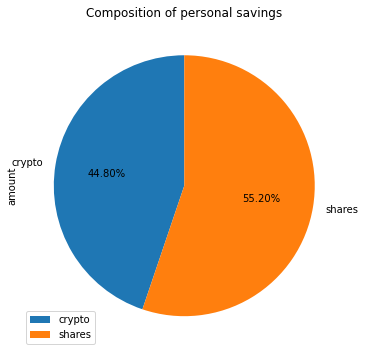

In [31]:
# Plot savings pie chart
df_savings.plot.pie( y="amount", autopct = '%1.2f%%', startangle = 90, figsize = (6,6), title = "Composition of personal savings")

In [32]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [33]:
# Calculate total amount of savings
total_savings = round(df_savings["amount"].sum(),2)
total_savings

67562.74

In [34]:
# Validate saving health
if total_savings == emergency_fund:
    print (f"Congratulation! Total savings are equal to emergency fund.\n" 
           f"You have reached your financial goal having the ideal emergency fund.")
elif total_savings > emergency_fund:
    print (f"Congratulation! Total savings are greater than the emergency fund. \n"
           f"You have enough money in your fund.")
else:
    gap =  emergency_fund - total_savings
    print (f"You are ${gap:,.2f} away from reaching your financial goal.")

Congratulation! Total savings are greater than the emergency fund. 
You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-07', tz='America/New_York').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_historical = alpaca_api.get_bars( tickers,
                                           timeframe,
                                           start = start_date,
                                           end = end_date).df

In [37]:
df_stock_historical

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,108.54,108.8400,108.4300,108.82,4259986,15562,108.754152,AGG
2015-12-02 05:00:00+00:00,108.73,108.7799,108.6100,108.67,2462787,11581,108.684692,AGG
2015-12-03 05:00:00+00:00,108.41,108.4100,107.8100,107.89,4634020,16801,108.040315,AGG
2015-12-04 05:00:00+00:00,108.05,108.3000,108.0000,108.24,2182057,9796,108.192232,AGG
2015-12-07 05:00:00+00:00,108.30,108.5800,108.2300,108.40,2143773,9104,108.460067,AGG
...,...,...,...,...,...,...,...,...
2022-10-03 04:00:00+00:00,361.12,368.5500,359.2100,366.61,89052594,617784,364.702960,SPY
2022-10-04 04:00:00+00:00,372.45,378.0000,366.5677,377.97,102736573,683092,375.718180,SPY
2022-10-05 04:00:00+00:00,373.32,379.4600,370.9500,377.09,87641027,581349,375.456940,SPY


In [38]:
# Reorganize the DataFrame
# Separate ticker data
df_agg =  df_stock_historical[df_stock_historical["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy =  df_stock_historical[df_stock_historical["symbol"] == "SPY"].drop("symbol", axis = 1)

In [39]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([df_agg, df_spy], axis = 1, keys=["AGG","SPY"])

In [40]:
#remove timestamp from index
df_portfolio.index = df_portfolio.index.date

In [41]:
# Display sample data
df_portfolio.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2015-12-01  108.54  108.8400  108.43  108.82  4259986       15562  108.754152   
2015-12-02  108.73  108.7799  108.61  108.67  2462787       11581  108.684692   
2015-12-03  108.41  108.4100  107.81  107.89  4634020       16801  108.040315   
2015-12-04  108.05  108.3000  108.00  108.24  2182057        9796  108.192232   
2015-12-07  108.30  108.5800  108.23  108.40  2143773        9104  108.460067   

               SPY                                                     \
              open      high       low   close     volume trade_count   
2015-12-01  209.42  210.8200  209.1100  210.68   97858418      337780   
2015-12-02  210.60  211.0000  208.2300  208.54  108069059      367013   
2015-12-03  208.90  209.1500  204.7511  205.58  166224154      546768   
2015-12-04  206.10  209.9700  205.9300  209.66  192878747      556731   
2015-12-07  209.20  209.7295  207.2000  208.27  102027111      374705   

                        
                  vwap  
2015-12-01  209.921410  
2015-12-02  209.563055  
2015-12-03  206.878936  
2015-12-04  208.178631  
2015-12-07  208.276128

In [42]:
#drop unused columns
drop_columns = ["open","high","low","volume","trade_count", "vwap"]

for x in tickers:
    for y in drop_columns:
        df_portfolio.drop(columns = (x,y), inplace = True)

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# assume 252 trading days in a year. 30 years means 7560 trading days (30 x 252)
# set weight 40% bond AGG and 60% stock SPY
MC_Y30 = MCSimulation(portfolio_data = df_portfolio,
                      weights = [0.40, 0.60],
                      num_simulation = 500 ,
                      num_trading_days = 252*30
                      )

In [44]:
# Printing the simulation input data
MC_Y30.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2015-12-01  108.82          NaN  210.68          NaN
2015-12-02  108.67    -0.001378  208.54    -0.010158
2015-12-03  107.89    -0.007178  205.58    -0.014194
2015-12-04  108.24     0.003244  209.66     0.019846
2015-12-07  108.40     0.001478  208.27    -0.006630

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Y30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996658,0.992578,1.011468,1.003056,0.996029,0.999066,0.995835,0.979181,1.016739,0.996113,...,0.989969,1.003954,1.008891,1.006889,0.988386,0.999499,1.006848,1.010237,1.003242,0.997782
2,0.999179,0.980398,1.004944,1.010179,0.980523,0.995056,0.990162,0.990811,1.017029,1.005438,...,0.979958,0.994749,0.995072,0.999905,0.985291,0.998928,1.006012,1.007071,0.997915,0.998834
3,0.998102,0.972953,1.004558,1.016309,0.986348,0.983066,0.983266,0.993675,1.034932,1.009548,...,0.963414,0.993132,0.990732,1.010077,0.989650,1.004307,0.998772,0.996733,1.003749,1.001804
4,1.005721,0.964421,1.000081,1.006646,0.974368,0.984024,0.982843,0.992773,1.037156,1.005299,...,0.951621,0.985239,0.991573,0.996538,1.001106,1.008814,0.999319,0.994314,1.001760,0.998079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.218516,5.070301,3.860283,5.087108,3.602781,4.191636,3.234712,1.724581,1.298603,3.252755,...,2.874669,6.663847,9.096954,8.248866,2.921756,7.775251,5.708812,6.810598,9.884705,4.744583
7557,1.223805,5.102114,3.848946,5.039031,3.627294,4.240815,3.236418,1.726551,1.306944,3.269042,...,2.854856,6.632347,9.056229,8.170238,2.942932,7.772587,5.712478,6.882107,9.782567,4.739177
7558,1.225453,5.152829,3.887889,5.015950,3.616215,4.238498,3.224270,1.720210,1.312514,3.257136,...,2.865265,6.608745,9.129136,8.194641,2.947470,7.758756,5.728660,6.876432,9.775763,4.696620
7559,1.233035,5.163458,3.918014,5.046202,3.590156,4.229870,3.231530,1.712457,1.323583,3.257589,...,2.863154,6.601980,9.136356,8.285759,2.971266,7.826164,5.658657,6.935866,9.733379,4.710280


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

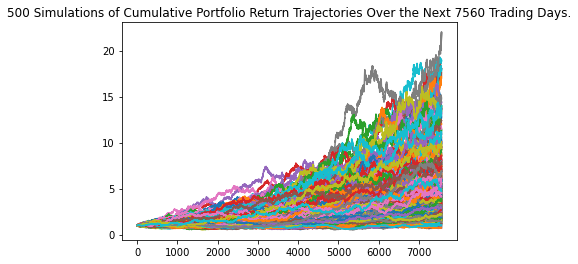

In [46]:
# Plot simulation outcomes
MC_Y30.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

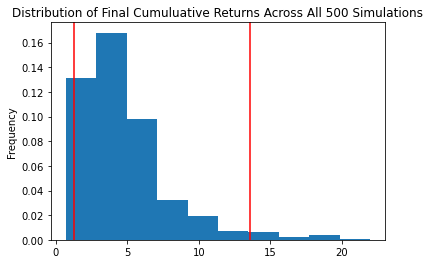

In [47]:
# Plot probability distribution and confidence intervals
MC_Y30.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y30_stats = MC_Y30.summarize_cumulative_return()

In [49]:
# Print summary statistics
print(MC_Y30_stats)

count           500.000000
mean              4.769904
std               3.110498
min               0.691180
25%               2.705945
50%               3.905723
75%               5.924898
max              21.993589
95% CI Lower      1.235055
95% CI Upper     13.550309
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

In [51]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_Y30_stats[8] * initial_investment
ci_upper = MC_Y30_stats[9] * initial_investment

In [52]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $24,701.09 and $271,006.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_Y30_stats[8] * initial_investment
ci_upper = MC_Y30_stats[9] * initial_investment

In [55]:
## Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $37,051.64 and $406,509.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05 = MCSimulation(portfolio_data = df_portfolio,
                      weights = [0.10, 0.90],
                      num_simulation = 500 ,
                      num_trading_days = 252*5
                      )

In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015354,0.996731,1.006463,1.004828,1.013586,0.981434,0.983003,0.995744,0.997866,0.993066,...,1.000876,0.998672,1.011043,1.009069,1.007840,1.008462,1.011036,1.005593,0.999216,1.001268
2,1.016065,0.991550,0.986847,0.985180,1.002560,0.975178,0.986298,1.000869,0.991063,0.994706,...,0.992203,0.998258,1.012230,1.012766,0.990396,1.013844,1.007158,0.996589,1.018083,0.996091
3,1.005470,0.988469,0.989762,0.965807,0.992754,0.982864,0.982330,1.018986,0.984454,0.975861,...,1.008798,0.995836,1.021895,1.043323,0.993011,1.031869,1.001436,0.978731,1.006557,0.983933
4,1.023673,1.014451,0.974156,0.962654,1.017598,0.961367,0.992853,1.019149,1.001959,1.004091,...,1.011497,1.010954,1.046171,1.028810,1.002613,1.049794,0.993418,0.974322,1.013585,0.980667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.136034,1.326896,1.783230,0.844814,1.589546,2.367611,2.392316,1.892232,1.079510,1.351524,...,1.932351,0.796787,1.598185,2.522258,1.148003,2.214114,0.927892,1.225777,1.777885,0.900544
1257,1.146942,1.319267,1.774584,0.841517,1.566397,2.348258,2.446005,1.902977,1.066631,1.338513,...,1.931401,0.795128,1.609598,2.540665,1.162719,2.216220,0.932747,1.235699,1.777431,0.922899
1258,1.165131,1.322718,1.788997,0.851296,1.531209,2.349349,2.456350,1.932903,1.074984,1.351258,...,1.937978,0.785017,1.596281,2.535699,1.162404,2.213600,0.932589,1.237848,1.817376,0.929746
1259,1.171034,1.327549,1.743381,0.850900,1.528412,2.397046,2.460286,1.899738,1.062513,1.359996,...,1.923892,0.795985,1.597808,2.543991,1.165409,2.227253,0.938613,1.238494,1.844395,0.956878


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

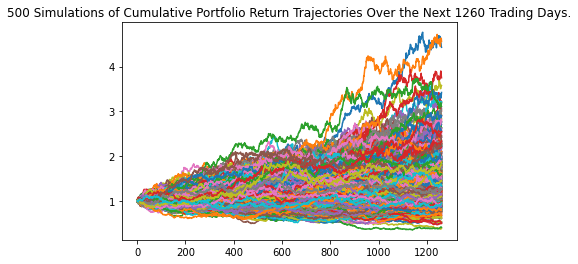

In [58]:
# Plot simulation outcomes
MC_Y05.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

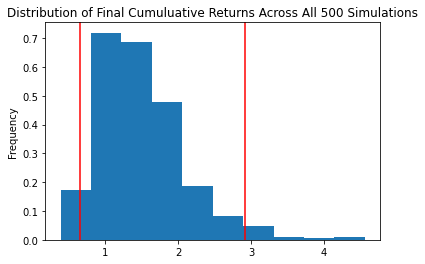

In [59]:
# Plot probability distribution and confidence intervals
MC_Y05.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y05_stats = MC_Y05.summarize_cumulative_return()

In [61]:
# Print summary statistics
print(MC_Y05_stats)

count           500.000000
mean              1.492213
std               0.595901
min               0.387655
25%               1.055629
50%               1.401050
75%               1.799109
max               4.561692
95% CI Lower      0.661129
95% CI Upper      2.912689
Name: 1260, dtype: float64


In [62]:
# Set initial investment
initial_investment = 20000*10

In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $200,000
ci_lower_five = MC_Y05_stats[8] * initial_investment
ci_upper_five = MC_Y05_stats[9] * initial_investment

In [64]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $200,000.00 in the portfolio over the next 5 years will end within in the range of $132,225.83 and $582,537.77


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10 = MCSimulation(portfolio_data = df_portfolio,
                      weights = [0.30, 0.70],
                      num_simulation = 500 ,
                      num_trading_days = 252*10
                      )

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998040,0.995173,0.981663,0.996502,1.009928,1.004396,0.994757,1.007927,1.004394,0.999927,...,1.002583,0.994073,0.996621,1.006533,0.991732,1.007198,0.991652,0.985312,0.987801,1.011928
2,1.007369,1.000345,0.986783,0.991847,1.003343,1.012674,0.993398,1.005562,1.006561,1.008375,...,0.998151,1.001150,1.000445,1.009687,0.978859,1.018362,0.986386,0.997206,0.994736,1.023285
3,1.001055,0.997002,0.985215,0.984394,1.007737,0.999406,0.989823,1.008770,1.010325,1.002353,...,0.995771,1.001960,1.000170,1.011230,0.985485,1.022341,0.989046,1.004835,0.988701,1.015959
4,1.008189,1.006091,0.987020,0.989837,1.014634,1.000423,0.988132,1.008347,1.011205,0.992862,...,0.998651,1.002996,1.003175,1.023606,0.980676,1.014374,1.000515,1.002308,0.987153,1.031621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.902678,2.039288,2.763868,2.664523,2.095333,2.151287,1.838959,1.220217,1.308889,2.045729,...,1.977993,2.576546,1.420218,2.307789,1.001088,1.556585,1.901295,3.047268,1.146647,2.701398
2517,0.901284,2.055869,2.741068,2.616292,2.071071,2.141625,1.838424,1.211807,1.323216,2.068100,...,1.984102,2.577871,1.421553,2.303162,0.989988,1.543302,1.899945,3.042932,1.143149,2.710647
2518,0.908732,2.024644,2.768573,2.596234,2.056792,2.135550,1.842351,1.214888,1.333647,2.066374,...,1.995469,2.605166,1.402586,2.291478,0.998134,1.537155,1.875430,3.035226,1.143731,2.717478
2519,0.923569,1.986003,2.762221,2.611664,2.050453,2.166506,1.853625,1.216635,1.338847,2.095767,...,2.031324,2.588622,1.412470,2.278045,1.004710,1.535667,1.864302,3.072004,1.130886,2.685396


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

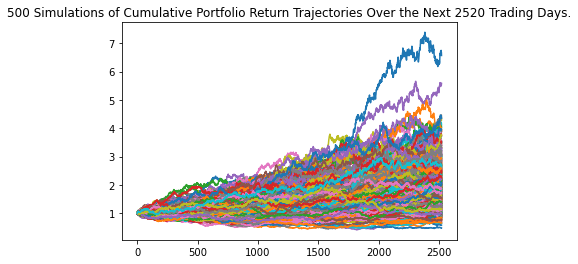

In [67]:
# Plot simulation outcomes
MC_Y10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

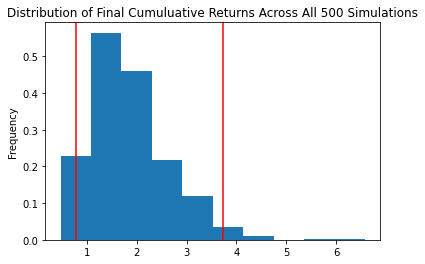

In [68]:
# Plot probability distribution and confidence intervals
MC_Y10.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y10_stats = MC_Y10.summarize_cumulative_return()

In [70]:
# Print summary statistics
print(MC_Y10_stats)

count           500.000000
mean              1.871732
std               0.783272
min               0.477582
25%               1.335296
50%               1.715971
75%               2.252226
max               6.571544
95% CI Lower      0.783797
95% CI Upper      3.739326
Name: 2520, dtype: float64


In [71]:
# Set initial investment
initial_investment = 20000*7

In [72]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $140,000
ci_lower_ten = MC_Y10_stats[8] * initial_investment
ci_upper_ten = MC_Y10_stats[9] * initial_investment

In [73]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $140,000.00 in the portfolio over the next 10 years will end within in the range of $109,731.58 and $523,505.64


#### Early Retirement considerations
Assuming one would like to maintain a similar lifestyle regardless when one retires,<br>
a) retiring in 5 years instead of 30 years time <br>
The initial investment amount will need to increase significantly. The above numerical illustration has used an increase of 10 times (or 1000%) in initial investment. <br>
The significant increase is to compensate the shorter wealth accumulation period. The investment portfolio was adjusted to include more risk (90% stock and 10% bond) to boost the expected portfolio return. <br>

b) retiring in 10 years instead of 30 years time <br>
Similarly, the initial invsetment amount will need to increase signficantly and could be less than the amount as if one would want to retire in 5 years time. The above numerical illustration has used an increase of 7 times (or 700%) in initial investment. The investment portfolio was adjusted to include more risk (70% stock and 30% bond) to boost the expected portfolio return.

The simulation results indicated that having a portfolio with more risk (i.e. higher proportion of stock) does not necessarily guarantee a higher return. The simulated average return for the 10 year portfolio is only 20% higher than the average return from the 5 year portfolio.Purely weighting the portfolio towards more risk does not guarantee sufficient fund for retirement if no increases in initial investment. Even with material inceases in initial investment, there is no guarantee there will be sufficient fund to support early retirement noting:
* investment risk
* longevity risk
* health risk
* inflation risk